<a href="https://colab.research.google.com/github/Nancy-Shi/Complex_Networks/blob/main/Compare_Hypergraph_and_Pairwise_Models_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import random
import math as math
from math import log
import seaborn as sns
import pandas as pd

## Part 1: Hypergraph Generation
The following steps generate a hyper graph using the XGI/HyperNetX python package,  following power-law degree distribution for predifined number of nodes n, number of hyperedges num_hyper_edges, degree exponent gamma, using a configuration model with data stored in a dictionary.

In [2]:
# Step 1: Generate Degree Sequence
def generate_degree_sequence(n, gamma, kmin):
    # Generate a random set from the power law distribution
    u = np.random.uniform(size=n)
    degrees = np.ceil((1.0 - u) ** (-1.0 / (gamma - 1.0)))

    # Adjust degrees based on the minimum and maximum degree values
    kmax = int(np.sqrt(n))
    # kmax = int(1.5*n**(1/4)) # max degree allowed is 1.5*n^(1/4)
    degrees = degrees[(degrees >= kmin) & (degrees <= kmax)].astype(int)

    # Truncate or pad the sequence to match the length specified
    if len(degrees) >= n:
        degrees = degrees[:n]
    else:
        degrees = np.concatenate((degrees, np.full(n - len(degrees), kmin)))

    return degrees.tolist()

# Step 2: Generate Hyper Edge Size Sequence
def generate_hyper_edge_sizes(degrees, num_hyper_edges):
    total_degrees = sum(degrees)
    hyper_edge_sizes = []

    # Calculate the average size for each hyper edge
    avg_size = total_degrees // num_hyper_edges
    remainder = total_degrees % num_hyper_edges

    # Define the range for the random distribution
    min_size = 1  # Lower bound of the range
    max_size = len(degrees)-num_hyper_edges  # Upper bound of the range

    # Generate hyper edge sizes
    for _ in range(num_hyper_edges):
        size = random.randint(min_size, max_size)
        hyper_edge_sizes.append(size)

    return hyper_edge_sizes


# Step 3: Create Copies of Nodes
def create_node_copies(degrees):
    node_copies = []
    for i, degree in enumerate(degrees):
        for _ in range(degree):
            node_copies.append(i)
    return node_copies

# Step 4: Create Copies of Hyper Edges
def create_hyper_edge_copies(hyper_edge_sizes):
    hyper_edge_copies = []
    for i, size in enumerate(hyper_edge_sizes):
        for _ in range(size):
            hyper_edge_copies.append(i)
    return hyper_edge_copies

# Step 5: Randomly Pair Copies
def randomly_pair_copies(node_copies, hyper_edge_copies):
    random.shuffle(node_copies)
    random.shuffle(hyper_edge_copies)
    pairs = []
    for i in range(len(node_copies)):
        pairs.append((node_copies[i], hyper_edge_copies[i]))
    return pairs

# Step 6: Convert Bipartite Graph to A Hypergraph Dictionary
def convert_to_hypergraph(pairs):
    hypergraph = {}
    for pair in pairs:
        node, hyper_edge = pair
        if hyper_edge in hypergraph:
            hypergraph[hyper_edge].append(node)
        else:
            hypergraph[hyper_edge] = [node]
    return hypergraph


In [3]:
def build_hypergraph(n, gamma, kmin, num_hyper_edges):
    # Step 1: Generate Degree Sequence
    degrees = generate_degree_sequence(n, gamma, kmin)
    print("Degree Sequence: ", degrees)

    # Step 2: Generate Hyper Edge Size Sequence
    hyper_edge_sizes = generate_hyper_edge_sizes(degrees, num_hyper_edges)
    print("Hyper Edge Sizes: ", hyper_edge_sizes)

    # Step 3: Create Copies of Nodes
    node_copies = create_node_copies(degrees)

    # Step 4: Create Copies of Hyper Edges
    hyper_edge_copies = create_hyper_edge_copies(hyper_edge_sizes)

    # Step 5: Randomly Pair Copies
    pairs = randomly_pair_copies(node_copies, hyper_edge_copies)

    # Step 6: Convert Bipartite Graph to Hypergraph
    hyperedge_dict = convert_to_hypergraph(pairs)

    # Print the resulting hypergraph
    print("Hypergraph Dictionary: ", hyperedge_dict)

    return degrees, hyperedge_dict


In [5]:
# Test 1
n =50  # Number of nodes
gamma = 2.5  # Power-law exponent
kmin = 3  # Minimum degree
num_hyper_edges = 8  # Desired number of hyper edges

degrees, hyperedge_dict = build_hypergraph(n, gamma, kmin, num_hyper_edges)

Degree Sequence:  [6, 3, 3, 3, 4, 3, 3, 3, 4, 4, 6, 4, 3, 3, 3, 3, 6, 3, 5, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
Hyper Edge Sizes:  [29, 28, 41, 12, 16, 28, 10, 2]
Hypergraph Dictionary:  {5: [12, 17, 39, 16, 37, 16, 40, 49, 36, 16, 22, 10, 15, 21, 39, 20, 7, 18, 14, 13, 3, 46, 31, 41, 47, 32, 20, 33], 1: [48, 15, 13, 21, 0, 9, 3, 19, 25, 28, 42, 11, 20, 15, 11, 45, 46, 38, 17, 11, 1, 28, 27, 16, 10, 45, 43, 5], 2: [44, 26, 4, 28, 0, 24, 31, 29, 35, 12, 10, 6, 4, 38, 27, 13, 18, 46, 9, 37, 44, 48, 48, 6, 33, 43, 23, 23, 22, 9, 38, 35, 34, 44, 14, 0, 40, 43, 8, 6, 14], 0: [37, 24, 35, 30, 16, 8, 26, 49, 26, 34, 49, 23, 3, 45, 29, 5, 36, 18, 22, 9, 41, 36, 19, 24, 30, 11, 39, 32, 7], 6: [5, 29, 47, 1, 10, 12, 32, 1, 27, 25], 4: [7, 0, 16, 4, 8, 2, 0, 10, 42, 0, 19, 47, 33, 30, 2, 17], 3: [42, 21, 25, 4, 2, 18, 40, 34, 31, 10, 18, 41], 7: [8]}


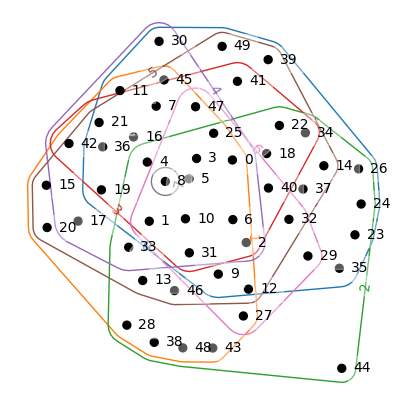

In [7]:
# Plot the hypergraph
#!pip install hypernetx
import hypernetx as hnx
H = hnx.Hypergraph(hyperedge_dict)
plt.subplots(figsize=(5,5))
hnx.draw(H)

In [8]:
# Test 2
n2 =400  # Number of nodes
gamma2 = 2.5  # Power-law exponent
kmin2 = 3  # Minimum degree
num_hyper_edges2 = 100  # Desired number of hyper edges

degrees2, hyperedge_dict2 = build_hypergraph(n2, gamma2, kmin2, num_hyper_edges2)
H2 = hnx.Hypergraph(hyperedge_dict2)

Degree Sequence:  [3, 4, 10, 4, 3, 4, 3, 5, 6, 4, 18, 3, 7, 4, 10, 5, 5, 3, 3, 3, 3, 6, 18, 3, 4, 5, 3, 3, 5, 10, 6, 4, 4, 3, 3, 4, 3, 4, 4, 3, 5, 5, 6, 4, 10, 3, 3, 5, 3, 3, 3, 7, 17, 5, 3, 7, 6, 4, 3, 3, 6, 4, 4, 3, 5, 4, 4, 3, 3, 3, 3, 3, 5, 3, 7, 14, 6, 8, 3, 4, 3, 6, 3, 3, 3, 5, 3, 7, 6, 4, 4, 4, 4, 3, 3, 4, 3, 3, 7, 19, 3, 3, 3, 3, 3, 3, 13, 4, 4, 4, 5, 4, 4, 3, 4, 3, 3, 3, 5, 7, 3, 3, 7, 3, 3, 3, 5, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,

In [108]:
# Test 3
n3 =400  # Number of nodes
gamma3 = 2.5  # Power-law exponent
kmin3 = 3  # Minimum degree
num_hyper_edges3 = 100  # Desired number of hyper edges

degrees3, hyperedge_dict3 = build_hypergraph(n3, gamma3, kmin3, num_hyper_edges3)
H3 = hnx.Hypergraph(hyperedge_dict3)

Degree Sequence:  [4, 15, 3, 3, 4, 3, 7, 3, 18, 3, 4, 4, 3, 4, 4, 4, 3, 5, 3, 16, 5, 13, 4, 3, 5, 6, 4, 4, 7, 5, 5, 6, 3, 3, 7, 3, 11, 5, 8, 4, 3, 3, 3, 3, 3, 3, 3, 6, 4, 4, 3, 7, 3, 3, 6, 8, 3, 3, 4, 12, 3, 4, 5, 3, 3, 3, 3, 3, 5, 9, 3, 3, 8, 3, 3, 3, 4, 3, 3, 5, 6, 10, 3, 3, 3, 3, 4, 3, 5, 4, 4, 4, 4, 3, 4, 4, 3, 3, 7, 4, 4, 3, 4, 4, 3, 3, 6, 3, 4, 3, 3, 3, 3, 4, 3, 3, 4, 3, 3, 9, 3, 3, 4, 3, 6, 3, 3, 7, 4, 3, 3, 3, 6, 5, 19, 3, 4, 4, 4, 5, 4, 4, 4, 5, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3

## Part 2: Assign Threshold
The following steps assigns a threshold value to each node in the network. The threshold follows a uniform or normal distribution with predefined mean (mu) and standard deviation (sigma).

In [9]:
import numpy as np
import random

# Defines the parameters to be used
mu = 0.1
sigma = 0.05

# Function to assign thresholds to the individual nodes
def assign_thresholds(hypergraph):
    NV = hypergraph.order()
    Ltre = {}

    for node in hypergraph.nodes():
          # Uniform distribution: #
          #Ltre[node] = np.random.uniform()
          # Normal distrution
          while True:
              threshold = random.gauss(mu, sigma)
              if 0 < threshold < 1:
                  break
          Ltre[node] = threshold

    return Ltre

Ltre = assign_thresholds(H)

print("Threshold List for Nodes: ", Ltre )

Threshold List for Nodes:  {0: 0.08520781071919598, 1: 0.1153238733720201, 2: 0.12687320941103816, 3: 0.08959651704226712, 4: 0.15021017888181862, 5: 0.11215299605747708, 6: 0.1434720000855345, 7: 0.09906708903728909, 8: 0.1264131848363534, 9: 0.04934956150707677, 10: 0.05605128682391901, 11: 0.05249557996619625, 12: 0.05618146835116561, 13: 0.07077477159686374, 14: 0.07215002961789377, 15: 0.18440271701801886, 16: 0.12275035982515749, 17: 0.16096005905307215, 18: 0.08797446327048872, 19: 0.07579365644371919, 20: 0.13639991997776837, 21: 0.06853276608740314, 22: 0.0567694947908551, 23: 0.0397634942867883, 24: 0.03370587577326141, 25: 0.11599120454248119, 26: 0.09576781968382495, 27: 0.1930095714474847, 28: 0.12369698447908184, 29: 0.18185195773139334, 30: 0.09848449474654007, 31: 0.07252041270727885, 32: 0.07365334697288682, 33: 0.1331958557848473, 34: 0.0568072431240098, 35: 0.08707689144492534, 36: 0.13738958553655203, 37: 0.1914258979613275, 38: 0.12934927011487482, 39: 0.1445865302

In [66]:
Ltre2 = assign_thresholds(H2)

print("Threshold List for Nodes: ", Ltre2 )

Threshold List for Nodes:  {0: 0.13268245872680562, 1: 0.11089362728812938, 2: 0.08598280290350636, 3: 0.1462008321103774, 4: 0.07865538806431971, 5: 0.12338825380462104, 6: 0.2007067518876141, 7: 0.13998696985461584, 8: 0.00867841064404612, 9: 0.04080887314277836, 10: 0.15530338947779251, 11: 0.036986172029718864, 12: 0.16273719015600097, 13: 0.16255966605105443, 14: 0.16806973896648442, 15: 0.0304587732035822, 16: 0.12130981131721116, 17: 0.0899206988025708, 18: 0.03284765186093826, 19: 0.1291788187402447, 20: 0.10138909402429559, 21: 0.015410967690483404, 22: 0.12896209673564815, 23: 0.046514640748401365, 24: 0.06478319518724213, 25: 0.21192983159796489, 26: 0.11104129137801737, 27: 0.10109872004501855, 28: 0.05310045538896681, 29: 0.12261925230895322, 30: 0.11031152565064256, 31: 0.13182050697200715, 32: 0.154666148785221, 33: 0.14224349889745264, 34: 0.03456696034982645, 35: 0.018412210254150907, 36: 0.10173563177163136, 37: 0.01824659862864275, 38: 0.12440771370356007, 39: 0.0919

## Part 3: Rumor Spreading on Hypergraph
The follow steps extends the basic rumor spreading model to a hypergraph. An infection or recovery event can only happen if its infected or recovered neighbors reach a pre-assigned threshold.  

In [10]:
def rumor_hyperedge_3(nw, ldeg, mu, lam, alp, n_samp):
    t_max = 10000
    N = nw.order()
    kmax = max(ldeg)
    sigma = 0
    ltre = assign_thresholds(nw)

    t_end = 0
    stifler_fractions = []

    for i_samp in range(1, n_samp+1):
        t = 0
        N_rec = 0

        states = {j: 0 for j in nw.nodes()}

        inf = []
        rec = []
        initial_node = np.random.choice(list(nw.nodes()))
        states[initial_node] = 1
        inf.append(initial_node)
        N_inf = 1
        N_e = nw.degree(initial_node)

        while N_inf != 0:
            total_rate = lam * N_e + 2 * alp * N_e
            tau = -np.log(np.random.uniform(1e-6, 1)) / total_rate
            t += tau

            if t >= t_max:
                break

            #print("Current time:", t)
            #print("Infected nodes:", inf)
            #print("Recovered nodes:", rec)
            #print("N_inf:", N_inf)
            #print("N_e:", N_e)
            #plt.figure()
            #plot_hypergraph(H, states)

            # Determine which event occurs
            event = np.random.uniform()
            p1 = lam / (lam + 2 * alp)
            p2 = (lam + alp )/ (lam + 2 * alp)

            # Determine if accept selected spreader based on degree distribution
            q_deg = np.random.uniform()


            # Infection:
            if event <= p1:
                # Select a spreader individual to spread the rumor
                inf_node = random.choice(inf)
                if q_deg < ldeg[inf_node] / kmax:
                    # Select a random hyper edge containing the infected node
                    infected_hyper_edge = np.random.choice(list(nw.edges()))
                    neighbors = nw[infected_hyper_edge]
                    while inf_node not in neighbors:
                        infected_hyper_edge = np.random.choice(list(nw.edges()))
                        neighbors = nw[infected_hyper_edge]

                    # Check if any neighbor meets the infection threshold
                    for neighbor in neighbors:
                        # Check if the selected neighbor is ignorant
                            if states[neighbor] == 0:
                                #print("Infection event")
                            # Check the threshold
                                count_inf_neighbors = sum(states[node] == 1 for node in nw.neighbors(neighbor))
                                if count_inf_neighbors / len(nw.neighbors(neighbor)) >= ltre[neighbor]:
                                    states[neighbor] = 1  # ignorant neighbor becomes spreader
                                    inf.append(neighbor)
                                    N_inf += 1
                                    #print("successful infection")


            else:  # Recovery
                # Select a spreader individual to recover
                rec_node = np.random.choice(inf)
                if q_deg < ldeg[rec_node] / kmax:
                    # Select a random hyperedge containing the recovered node
                    recovered_hyper_edge = np.random.choice(list(nw.edges()))
                    # Get neighbors list
                    neighbors = nw[recovered_hyper_edge]
                    #print("Recovery event", neighbors)
                    if event <=p2:
                        count_rec_neighbors = sum(states[node] == 2 for node in neighbors)
                        #print("count_rec_neighbors", count_rec_neighbors)
                        if count_rec_neighbors / len(neighbors) >= ltre[rec_node]:
                        #if count_rec_neighbors > 0:
                            # Update spreader to stifler if the selected neighbor is a stifler or spreader
                            states[rec_node] = 2
                            N_inf -= 1
                            inf.remove(rec_node)
                            rec.append(rec_node)
                            N_rec += 1
                            #print("successful recovery")

                    else:
                        count_rec_neighbors = sum(states[node] == 1 for node in neighbors)
                        #print("count_rec_neighbors", count_rec_neighbors)
                        if count_rec_neighbors / len(neighbors) >= ltre[rec_node]:
                        #if count_rec_neighbors > 0:
                            # Update spreader to stifler if the selected neighbor is a stifler or spreader
                            states[rec_node] = 2
                            N_inf -= 1
                            inf.remove(rec_node)
                            rec.append(rec_node)
                            N_rec += 1
                            #print("successful recovery")

                    """
                    else:
                        for neighbor in neighbors:
                        # Check the threshold of infected
                            count_inf_neighbors = 0
                            for node in neighbors:
                                if states[node] == 1:
                                    count_inf_neighbors += 1
                            if count_inf_neighbors / len(neighbors) >= Ltre[rec_node]:
                                # Update spreader to stifler if the selected neighbor is a stifler
                                states[rec_node] = 2
                                N_inf -= 1
                                N_e -= nw.degree(rec_node)
                                inf.remove(rec_node)
                                rec.append(rec_node)
                                N_rec += 1
                    """
            #print("N_inf after event:", N_inf)
            #print("N_e after event:", N_e)


        if N_inf == 0:
              t_end += t
              stifler_frac = N_rec / N
              stifler_fractions.append(stifler_frac)
              print("Sampling result - Lam:", lam, "N_rec:", N_rec, "t_end:", t_end, "stifler_frac:", stifler_frac)

    avg_stifler_frac = sum(stifler_fractions) / n_samp
    t_end_av = t_end/n_samp

    #return nw, states
    return avg_stifler_frac, t_end_av

The following function generates the hypergraph based on nodes' disease status, where susceptible nodes are yellow, infected nodes are purple, and recovered nodes are green.

In [11]:
def plot_hypergraph(hypergraph, states):
    pos = nx.spring_layout(hypergraph)
    node_colors = []
    #node_sizes = []
    for node in hypergraph.nodes():
        if states[node] == 1:  # Infected node (purple)
            node_colors.append("purple")
        elif states[node] == 2:  # Recovered node (green)
            node_colors.append("green")
        else:  # Susceptible node (yellow)
            node_colors.append("yellow")
        #node_sizes.append(thresholds[node] * 100)  # Adjust node size based on threshold value

    hnx.drawing.draw(hypergraph, pos, nodes_kwargs={'facecolors': node_colors})

Sampling result - Lam: 0.1 N_rec: 392 t_end: 395.2117108112266 stifler_frac: 0.98
Sampling result - Lam: 0.1 N_rec: 398 t_end: 649.9815485263712 stifler_frac: 0.995
Sampling result - Lam: 0.1 N_rec: 386 t_end: 1055.9789561339476 stifler_frac: 0.965
Sampling result - Lam: 0.1 N_rec: 398 t_end: 1491.5829890162595 stifler_frac: 0.995
Sampling result - Lam: 0.1 N_rec: 400 t_end: 1939.3558785143891 stifler_frac: 1.0
Sampling result - Lam: 0.1 N_rec: 384 t_end: 2353.628953445703 stifler_frac: 0.96
Sampling result - Lam: 0.1 N_rec: 395 t_end: 2710.8268013503225 stifler_frac: 0.9875
Sampling result - Lam: 0.1 N_rec: 395 t_end: 2785.806082984616 stifler_frac: 0.9875
Sampling result - Lam: 0.1 N_rec: 1 t_end: 2793.1036166679564 stifler_frac: 0.0025
Sampling result - Lam: 0.1 N_rec: 225 t_end: 3201.09264874733 stifler_frac: 0.5625
Sampling result - Lam: 0.1 N_rec: 390 t_end: 3650.2045062293787 stifler_frac: 0.975
Sampling result - Lam: 0.1 N_rec: 1 t_end: 3663.266444588291 stifler_frac: 0.0025
Sa

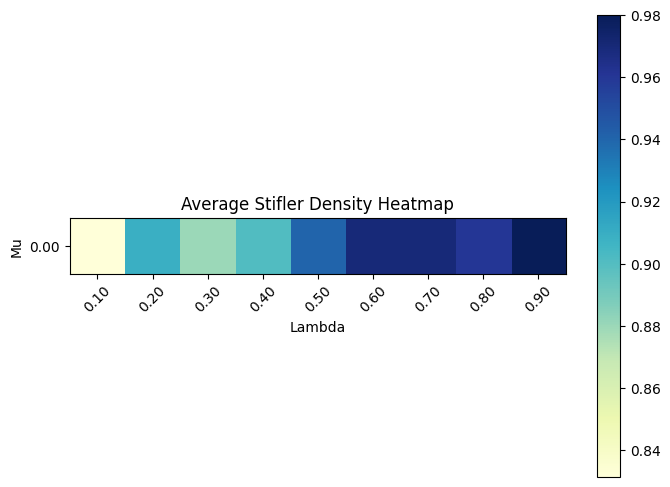

In [13]:
n_samp = 100
alp = 1

# Set the mu and lambda_values
mu_values = np.arange(0.0, 0.1, 0.1)
lambda_values = np.arange(0.1, 1.0, 0.1)

# Initialize the result array
results = np.zeros((len(mu_values), len(lambda_values)))

# Iterate over mu and lambda values
for i, mu in enumerate(mu_values):
    for j, lam in enumerate(lambda_values):
        rho_R_av, t_end_av = rumor_hyperedge_3(H2, degrees2, mu, lam, alp, n_samp)
        results[i, j] = rho_R_av

import matplotlib.ticker as ticker

# Plot the heat map
fig, ax = plt.subplots(figsize=(8, 6))
heatmap = ax.imshow(results, cmap='YlGnBu', interpolation='nearest')

# Set the tick labels and show colorbar
ax.set_xticks(np.arange(len(lambda_values)))
ax.set_yticks(np.arange(len(mu_values)))

# Format the tick labels with two decimal places using string formatting
lambda_formatter = ticker.StrMethodFormatter('{:.2f}'.format)
mu_formatter = ticker.StrMethodFormatter('{:.2f}'.format)
ax.xaxis.set_major_formatter(lambda_formatter)
ax.yaxis.set_major_formatter(mu_formatter)

ax.set_xticklabels(['{:.2f}'.format(val) for val in lambda_values])
ax.set_yticklabels(['{:.2f}'.format(val) for val in mu_values])
plt.xticks(rotation=45)
plt.colorbar(heatmap)

# Set labels and title
ax.set_xlabel('Lambda')
ax.set_ylabel('Mu')
ax.set_title('Average Stifler Density Heatmap')

# Display the heat map
plt.show()
